# Creating & Training The Emotion Detector Model

In [1]:
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
with open('dataset.pickle', 'rb') as handle:
    data = pickle.load(handle)

X = data['X']
y = data['y']

X.shape, y.shape

((3000, 1404), (3000,))

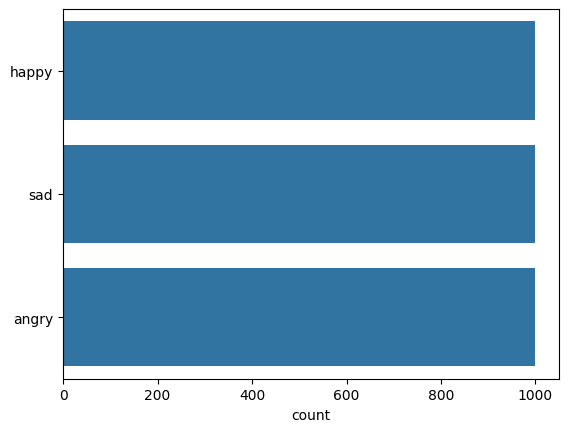

In [3]:
sns.countplot(data=y)
plt.show()

# Preprocessing

In [4]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))
encoder.categories_[0]

array(['angry', 'happy', 'sad'], dtype='<U5')

In [5]:
y_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## Splitting Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify=y_test, test_size=0.2, random_state=42)
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((2700, 1404), (2700, 3)), ((240, 1404), (240, 3)), ((60, 1404), (60, 3)))

## Training

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

## Evaluating

### Validation

In [8]:
y_pred = [np.argmax(x) for x in clf.predict(X_val)]
y_true= [np.argmax(x) for x in y_val]
score = accuracy_score(y_true=y_true, y_pred=y_pred)
print('The validation score is', score*100)

The validation score is 96.25


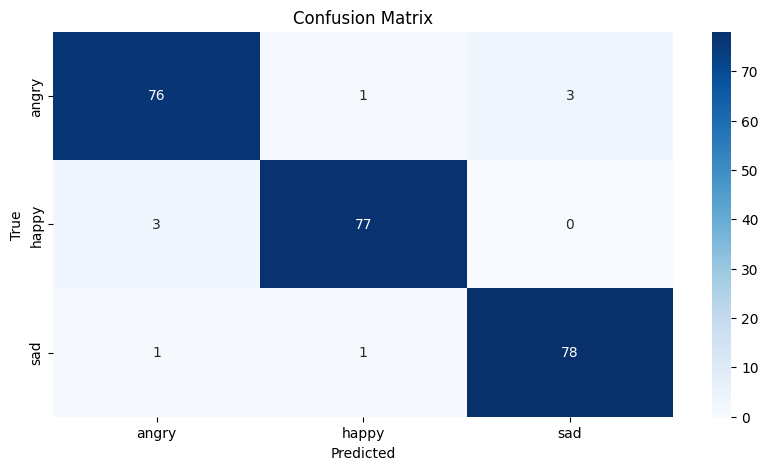

In [9]:
_, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data=confusion_matrix(y_true=y_true, y_pred=y_pred), 
            xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0],
            annot=True, ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test

In [10]:
y_pred = [np.argmax(x) for x in clf.predict(X_test)]
y_true= [np.argmax(x) for x in y_test]
score = accuracy_score(y_true=y_true, y_pred=y_pred)
print('The test score is', score*100)

The test score is 96.66666666666667


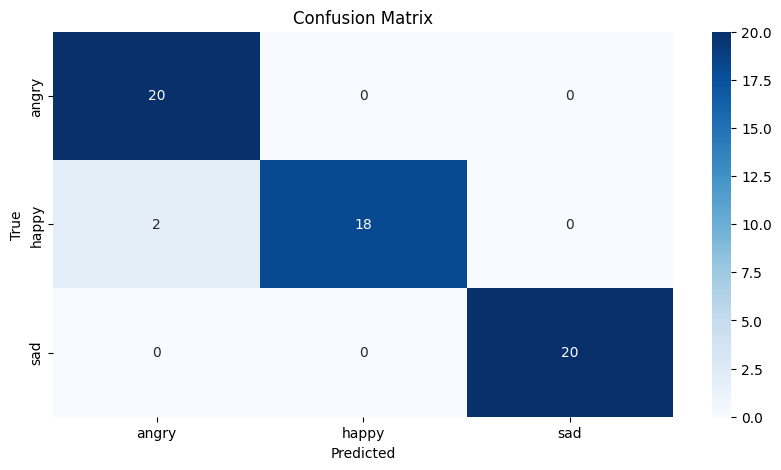

In [11]:
_, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data=confusion_matrix(y_true=y_true, y_pred=y_pred),
            xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0],
            annot=True, ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Saving the model

In [12]:
with open('model.pickle', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)